<a href="https://colab.research.google.com/github/PremaKathiresanVasagam/TSAI---EVA5/blob/master/S12/Assign_B/Assign_B_BBox_Norm_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Find the image size and store in a dictionary
import os
from PIL import Image

folder_images = "E:\AI\Session12\ImagesWithBBox"
size_images = dict()

for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, heigth = img.size
            size_images[path_image] = {'width': width, 'heigth': heigth}

print(size_images)

{'B_002.jpg': {'width': 1300, 'heigth': 866}, 'B_003.jpg': {'width': 800, 'heigth': 989}, 'B_004.jpg': {'width': 2000, 'heigth': 1347}, 'B_005.jpg': {'width': 658, 'heigth': 1024}, 'B_006.jpg': {'width': 275, 'heigth': 183}, 'B_Img001.jpg': {'width': 1500, 'heigth': 1105}, 'HB_Img001.jpg': {'width': 900, 'heigth': 600}, 'HB_Img002.jpg': {'width': 768, 'heigth': 1024}, 'HB_Img003.jpg': {'width': 866, 'heigth': 1300}, 'HMB_Img_001.jpg': {'width': 334, 'heigth': 501}, 'HMB_Img_002.jpg': {'width': 1200, 'heigth': 900}, 'HM_Img_001.jpg': {'width': 1024, 'heigth': 682}, 'HM_Img_002.jpg': {'width': 800, 'heigth': 534}, 'HM_Img_003.jpg': {'width': 275, 'heigth': 183}, 'HM_Img_004.jpg': {'width': 1024, 'heigth': 682}, 'HM_Img_005.jpg': {'width': 1024, 'heigth': 682}, 'HM_Img_006.jpg': {'width': 553, 'heigth': 331}, 'HM_Img_007.jpg': {'width': 626, 'heigth': 417}, 'HM_Img_008.jpg': {'width': 800, 'heigth': 534}, 'HM_Img_009.jpg': {'width': 1600, 'heigth': 1157}, 'HM_Img_010.jpg': {'width': 311, 

In [ ]:
#Convert dict to dataframe before saving it as a csv
import pandas as pd
df=(pd.DataFrame(size_images)).transpose()
print(df)

                 heigth  width
B_002.jpg           866   1300
B_003.jpg           989    800
B_004.jpg          1347   2000
B_005.jpg          1024    658
B_006.jpg           183    275
B_Img001.jpg       1105   1500
HB_Img001.jpg       600    900
HB_Img002.jpg      1024    768
HB_Img003.jpg      1300    866
HMB_Img_001.jpg     501    334
HMB_Img_002.jpg     900   1200
HM_Img_001.jpg      682   1024
HM_Img_002.jpg      534    800
HM_Img_003.jpg      183    275
HM_Img_004.jpg      682   1024
HM_Img_005.jpg      682   1024
HM_Img_006.jpg      331    553
HM_Img_007.jpg      417    626
HM_Img_008.jpg      534    800
HM_Img_009.jpg     1157   1600
HM_Img_010.jpg      162    311
HVB_Img_001.jpg     501    334
HVB_Img_002.jpg     500    375
HVB_Img_003.jpg     500    750
HVB_Img_004.jpg     500    667
HVB_Img_005.jpg     502    277
HVB_Img_006.jpg     501    334
HVB_Img_007.jpg     750    500
HVB_Img_008.jpg     500    375
HVB_Img_009.jpg     501    408
...                 ...    ...
MV_001.j

In [ ]:
#Save dataframe in .csv
import os
os.chdir(r"E:\AI\Session12\JSON")
df.to_csv("Image_size_generated.csv")

In [ ]:
#Read two csv files 1. VGG Annotatore CSV file 2. Image_size_generated CSV file
df1 = pd.read_csv("VGG_Annotator_export_as_CSV.csv")
df2 = pd.read_csv("Image_size_generated.csv")
df2.rename( columns={'Unnamed: 0':'filename'}, inplace=True )

In [ ]:
df1.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,B_002.jpg,122572,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":229,""y"":224,""width"":826,""he...","{""CLASS"":""Boots""}"
1,B_003.jpg,98922,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":282,""y"":644,""width"":204,""he...","{""CLASS"":""Boots""}"
2,B_004.jpg,516934,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":861,""y"":1020,""width"":228,""h...","{""CLASS"":""Boots""}"
3,B_005.jpg,145962,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":190,""y"":808,""width"":305,""he...","{""CLASS"":""Boots""}"
4,B_006.jpg,12468,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,0,"{""name"":""rect"",""x"":21,""y"":73,""width"":66,""heigh...","{""CLASS"":""Boots""}"


In [ ]:
df2.head()

,filename,heigth,width
0,B_002.jpg,866,1300
1,B_003.jpg,989,800
2,B_004.jpg,1347,2000
3,B_005.jpg,1024,658
4,B_006.jpg,183,275


In [ ]:
#Merge two files using LEFT JOIN with filename attribute
df3 = df1.merge(df2, on=['filename'], how='left')
df3.to_csv("Img_dims_with_bbox_dims.csv") #Saved the merged CSV file to edit manually and keep only relevant columns

In [ ]:
df3.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,heigth,width
0,B_002.jpg,122572,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":229,""y"":224,""width"":826,""he...","{""CLASS"":""Boots""}",866,1300
1,B_003.jpg,98922,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":282,""y"":644,""width"":204,""he...","{""CLASS"":""Boots""}",989,800
2,B_004.jpg,516934,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":861,""y"":1020,""width"":228,""h...","{""CLASS"":""Boots""}",1347,2000
3,B_005.jpg,145962,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":190,""y"":808,""width"":305,""he...","{""CLASS"":""Boots""}",1024,658
4,B_006.jpg,12468,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,0,"{""name"":""rect"",""x"":21,""y"":73,""width"":66,""heigh...","{""CLASS"":""Boots""}",183,275


In [ ]:
#In the above frame df3 we see height column first and width column next, eventhough we saved the CSV as width, height
#While editing, 1. We can manually bring width column first 2. keep relevant columns only

In [ ]:
#Read final dataframe
data = pd.read_csv("Final_frame_manually_edited.csv")

In [ ]:
data.head()

,Class,filename,Img_width,Img_height,X,Y,Bbox_width,Bbox_height
0,Boots,B_002.jpg,1300,866,229,224,826,313
1,Boots,B_003.jpg,800,989,282,644,204,340
2,Boots,B_004.jpg,2000,1347,861,1020,228,158
3,Boots,B_005.jpg,658,1024,190,808,305,145
4,Boots,B_006.jpg,275,183,21,73,66,50


In [ ]:
"""
Class - Boots/HardHat/Mask/Vests
Filename   - Image name
Img_width  - Width of the image
Img_height - Height of the image #Resolution of image = Img_width X Img_height
X          - In X-axis, Start of bounding box from top left corner
Y          - In Y-axis, Start of bounding box from top left corner
BBox_Width - Width of the bounding box(x)
BBox_height- Height of the bounding box(y)
"""

'\nClass - Boots/HardHat/Mask/Vests\nFilename   - Image name\nImg_width  - Width of the image\nImg_height - Height of the image #Resolution of image = Img_width X Img_height\nX          - In X-axis, Start of bounding box from top left corner\nY          - In Y-axis, Start of bounding box from top left corner\nBBox_Width - Width of the bounding box(x)\nBBox_height- Height of the bounding box(y)\n'

In [ ]:
data['Norm_bbox_Width'] = data['Bbox_width']/data['Img_width']
data['Norm_bbox_Height'] = data['Bbox_height']/ data['Img_height']

"""
Norm_bbox_Width - Normalized bbox width (0 - 1)
Norm_bbox_Height - Normalized bbox height (0 - 1)
"""

Text(0,0.5,'Normalized BBox Height')

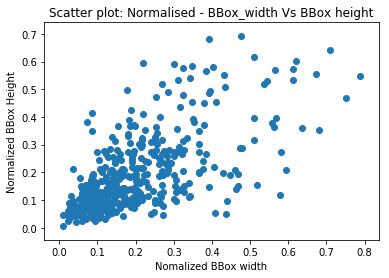

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['Norm_bbox_Width'], data['Norm_bbox_Height'])
plt.title('Normalised - BBox_width Vs BBox height')
plt.xlabel('Nomalized BBox width')
plt.ylabel('Normalized BBox Height')

In [ ]:
import numpy as np
data['log_Norm_bbox_Width'] = np.log(data['Bbox_width']/data['Img_width'])
data['log_Norm_bbox_Height'] = np.log(data['Bbox_height']/ data['Img_height'])

"""
log_Norm_bbox_Width - log(Normalized bbox width (0 - 1))
log_Norm_bbox_Height - log(Normalized bbox height (0 - 1))
"""

Text(0,0.5,'log Normalized BBox Height')

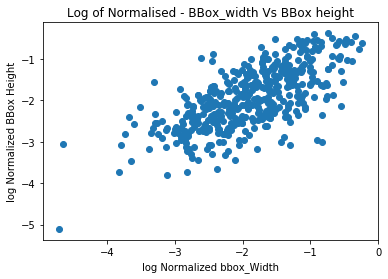

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['log_Norm_bbox_Width'], data['log_Norm_bbox_Height'])
plt.title('Log of Normalised - BBox_width Vs BBox height')
plt.xlabel('log Normalized bbox_Width')
plt.ylabel('log Normalized BBox Height')

In [ ]:
data.head()

,Class,filename,Img_width,Img_height,X,Y,Bbox_width,Bbox_height,Norm_bbox_Width,Norm_bbox_Height,log_Norm_bbox_Width,log_Norm_bbox_Height
0,Boots,B_002.jpg,1300,866,229,224,826,313,0.635385,0.361432,-0.453525,-1.017682
1,Boots,B_003.jpg,800,989,282,644,204,340,0.255000,0.343782,-1.366492,-1.067749
2,Boots,B_004.jpg,2000,1347,861,1020,228,158,0.114000,0.117298,-2.171557,-2.143040
3,Boots,B_005.jpg,658,1024,190,808,305,145,0.463526,0.141602,-0.768893,-1.954738
4,Boots,B_006.jpg,275,183,21,73,66,50,0.240000,0.273224,-1.427116,-1.297463


In [ ]:
#K-means clustering for normalized and log normalized width & Height

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [ ]:
X = data[['Norm_bbox_Width', 'Norm_bbox_Height']]

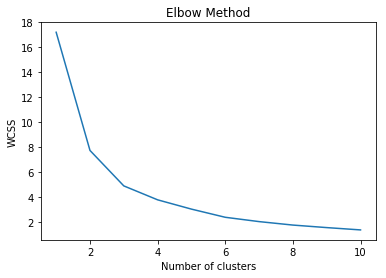

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

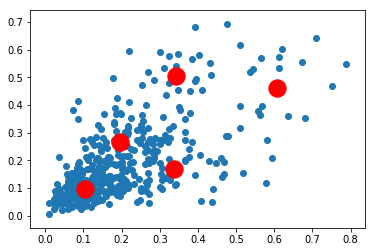

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
X_log = data[['log_Norm_bbox_Width', 'log_Norm_bbox_Height']]

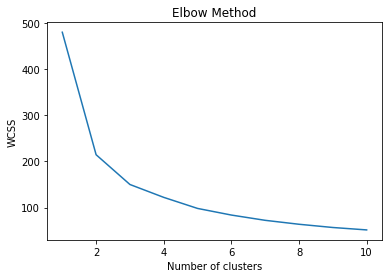

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_log)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

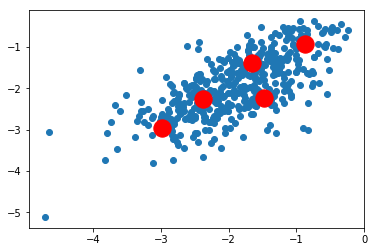

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_log)
plt.scatter(X_log.iloc[:,0], X_log.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()